# Práctica 01

- Introducción al procesamiento digital de imágenes: detección base de cambios en una imagen (escala de grises y a color) a través del cálculo de entropía. Fundamentos de la librería scikit-image como herramienta de soporte en Visión por Computador.

**Nombre:** Felipe Peralta
**Fecha:** 25 de octubre de 2025  
**Materia:** Visión por Computador

---

### Contenido

0. **Marco teórico**
1. **Importación de Librerías**
2. **Función para Alterar Imágenes**
3. **Procesamiento de Imágenes con Diferentes Niveles de Ruido**
4. **Cálculo de Entropía en Imágenes**
5. **Exportación de Resultados a CSV**
6. **Visualización: Diagrama de Cajas y Bigotes**
7. **Visualización: Gráficos de Densidad (KDE)**
8. **Conclusiones**
9. **Referencias**

## 0. Marco teórico

- La entropía es un concepto fundamental que atraviesa diversas disciplinas científicas, desde la física hasta la ciencia de la computación. Su origen se remonta a la termodinámica del siglo XIX, donde Ludwig Boltzmann la formuló como una medida cuantitativa del "desorden" de un sistema físico. Específicamente, la entropía termodinámica se relaciona con el número de microestados (configuraciones microscópicas de partículas) que son consistentes con un macroestado observable (como la temperatura o la presión). Un sistema con una mayor cantidad de microestados posibles se considera más desordenado y, por ende, posee una mayor entropía. Esta noción de desorden es intrínsecamente una medida de imprevisibilidad: cuanto más desordenado es un sistema, más difícil es predecir su estado exacto en un momento dado [1][2].
- Este puente conceptual entre desorden e imprevisibilidad fue formalizado matemáticamente por Claude E. Shannon en 1948, en su artículo fundacional "Una teoría matemática de la comunicación". Shannon adaptó el concepto de entropía para el campo emergente de la teoría de la información, redefiniéndolo como una medida de la "incertidumbre" o la "información promedio" contenida en un mensaje o fuente de datos [3][4].
- El cálculo de la entropía para una imagen en escala de grises es la aplicación más directa de la fórmula de Shannon en el dominio de la imagen. Una imagen digital en escala de grises, típicamente de 8 bits, es una matriz donde cada píxel puede tomar uno de los 256 valores de intensidad posibles (de 0 a 255). Estos niveles de gris son los "símbolos" emitidos por la fuente de información que es la imagen [5].
    - El proceso de cálculo es el siguiente
        - Calcular el Histograma
        - Normalizar el Histograma
        - Aplicar la Fórmula de Shannon
    - El valor de entropía resultante se interpreta de la siguiente manera:
        - Baja Entropía: Indica una imagen con poca complejidad visual. 
        - Alta Entropía: Señala una imagen con alta complejidad y aleatoriedad. 
- En la práctica, la librería scikit-image proporciona una implementación directa y eficiente para este cálculo [5][6].

## 1. Importación de librerias

In [26]:
import os
import matplotlib.pyplot as plt
from skimage import io
from skimage.util import random_noise
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import measure
from scipy.stats import entropy as scipy_entropy
from random import random
import random

## 2. Función para Alterar Imágenes

In [3]:
# Función que agrega ruido gaussiano a las imágenes
def alterar_imagen(origen, destino, var):
    print(f"Procesando imágenes de {origen} con varianza de ruido {var}...")
    
    for filename in os.listdir(origen):
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):

            original_image_path = os.path.join(origen, filename)
            original_image = io.imread(original_image_path)
            
            # agregar ruido gaussiano
            noisy_image = random_noise(original_image, mode='gaussian', var=var)
            
            noisy_image_uint8 = (noisy_image * 255).astype(np.uint8)
            output_image_path = os.path.join(destino, filename)
            io.imsave(output_image_path, noisy_image_uint8)
    
    print(f"Imágenes procesadas de {origen} y guardadas en {destino}")

## 3. Procesamiento de Imágenes con Diferentes Niveles de Ruido

In [4]:
# Aplicamos tres niveles diferentes de ruido gaussiano a las imágenes originales: Leve, Moderado y Alto

categorias = ['Lilly', 'Lotus', 'Orchid']
niveles_ruido = {'leve': 0.01, 'moderado': 0.05, 'alto': 0.2}

for categoria in categorias:
    for nivel, var in niveles_ruido.items():
        origen = f'dataset2/original/{categoria}/'
        destino = f'dataset2/mod-{nivel}/{categoria}/'
        os.makedirs(destino, exist_ok=True)
        alterar_imagen(origen, destino, var)

Procesando imágenes de dataset2/original/Lilly/ con varianza de ruido 0.01...
Imágenes procesadas de dataset2/original/Lilly/ y guardadas en dataset2/mod-leve/Lilly/
Procesando imágenes de dataset2/original/Lilly/ con varianza de ruido 0.05...
Imágenes procesadas de dataset2/original/Lilly/ y guardadas en dataset2/mod-leve/Lilly/
Procesando imágenes de dataset2/original/Lilly/ con varianza de ruido 0.05...
Imágenes procesadas de dataset2/original/Lilly/ y guardadas en dataset2/mod-moderado/Lilly/
Procesando imágenes de dataset2/original/Lilly/ con varianza de ruido 0.2...
Imágenes procesadas de dataset2/original/Lilly/ y guardadas en dataset2/mod-moderado/Lilly/
Procesando imágenes de dataset2/original/Lilly/ con varianza de ruido 0.2...
Imágenes procesadas de dataset2/original/Lilly/ y guardadas en dataset2/mod-alto/Lilly/
Procesando imágenes de dataset2/original/Lotus/ con varianza de ruido 0.01...
Imágenes procesadas de dataset2/original/Lilly/ y guardadas en dataset2/mod-alto/Lilly

- **Leve** (var=0.01): Ruido apenas perceptible
- **Moderado** (var=0.05): Ruido visible pero la imagen sigue siendo clara
- **Alto** (var=0.2): Ruido significativo que degrada notablemente la imagen

## 4. Cálculo de Entropía en Imágenes

### Cálculo de Entropía de Shannon

Dado que a entropía mide la cantidad de información o "desorden" en una imagen:
- Entropía alta: Significa que una imagen es compleja, con mucha variación (más información)
- Entropía baja: Significa que una imagen es simple, con poca variación (menos información)

Se calcula la entropía para:
1. Imágenes a color (RGB): Usando todos los canales
2. Imágenes en escala de grises: Usando solo intensidades

In [11]:
# Calcular la entropia de una imagen
def calcular_entropia(imagen):
    hist, _ = np.histogram(imagen.flatten(), bins=256, range=(0, 256))
    hist = hist / hist.sum()
    hist = hist[hist > 0]
    return scipy_entropy(hist, base=2)

resultados = []
rutas = ['original', 'mod-leve', 'mod-moderado', 'mod-alto']
categorias = ['Lilly', 'Lotus', 'Orchid']

for ruta in rutas:
    for categoria in categorias:

        carpeta_path = f'dataset2/{ruta}/{categoria}/'
        
        print(f"Procesando: {carpeta_path}")
        
        if not os.path.exists(carpeta_path):
            print(f"Carpeta no encontrada: {carpeta_path}")
            continue
        
        for filename in os.listdir(carpeta_path):

            if filename.endswith(('.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG')):
                
                img_path = os.path.join(carpeta_path, filename)
                img_color = io.imread(img_path)
                
                # Calcular entropía de la imagen a color
                entropia_color = calcular_entropia(img_color)

                # Calcular entropía de la imagen en gris
                img_gris = rgb2gray(img_color)
                img_gris_uint8 = (img_gris * 255).astype(np.uint8)
                entropia_gris = calcular_entropia(img_gris_uint8)

                # Guardar en la lista de resultados
                resultados.append({
                    'categoria': categoria,
                    'imagen': filename,
                    'modificacion': ruta,
                    'entropia_color': entropia_color,
                    'entropia_gris': entropia_gris
                })

print(f"Total de imágenes procesadas: {len(resultados)}")

Procesando: dataset2/original/Lilly/
Procesando: dataset2/original/Lotus/
Procesando: dataset2/original/Orchid/
Procesando: dataset2/mod-leve/Lilly/
Procesando: dataset2/mod-leve/Lotus/
Procesando: dataset2/mod-leve/Orchid/
Procesando: dataset2/mod-moderado/Lilly/
Procesando: dataset2/mod-moderado/Lotus/
Procesando: dataset2/mod-moderado/Orchid/
Procesando: dataset2/mod-alto/Lilly/
Procesando: dataset2/mod-alto/Lotus/
Procesando: dataset2/mod-alto/Orchid/
Total de imágenes procesadas: 11996


### Ejemplos

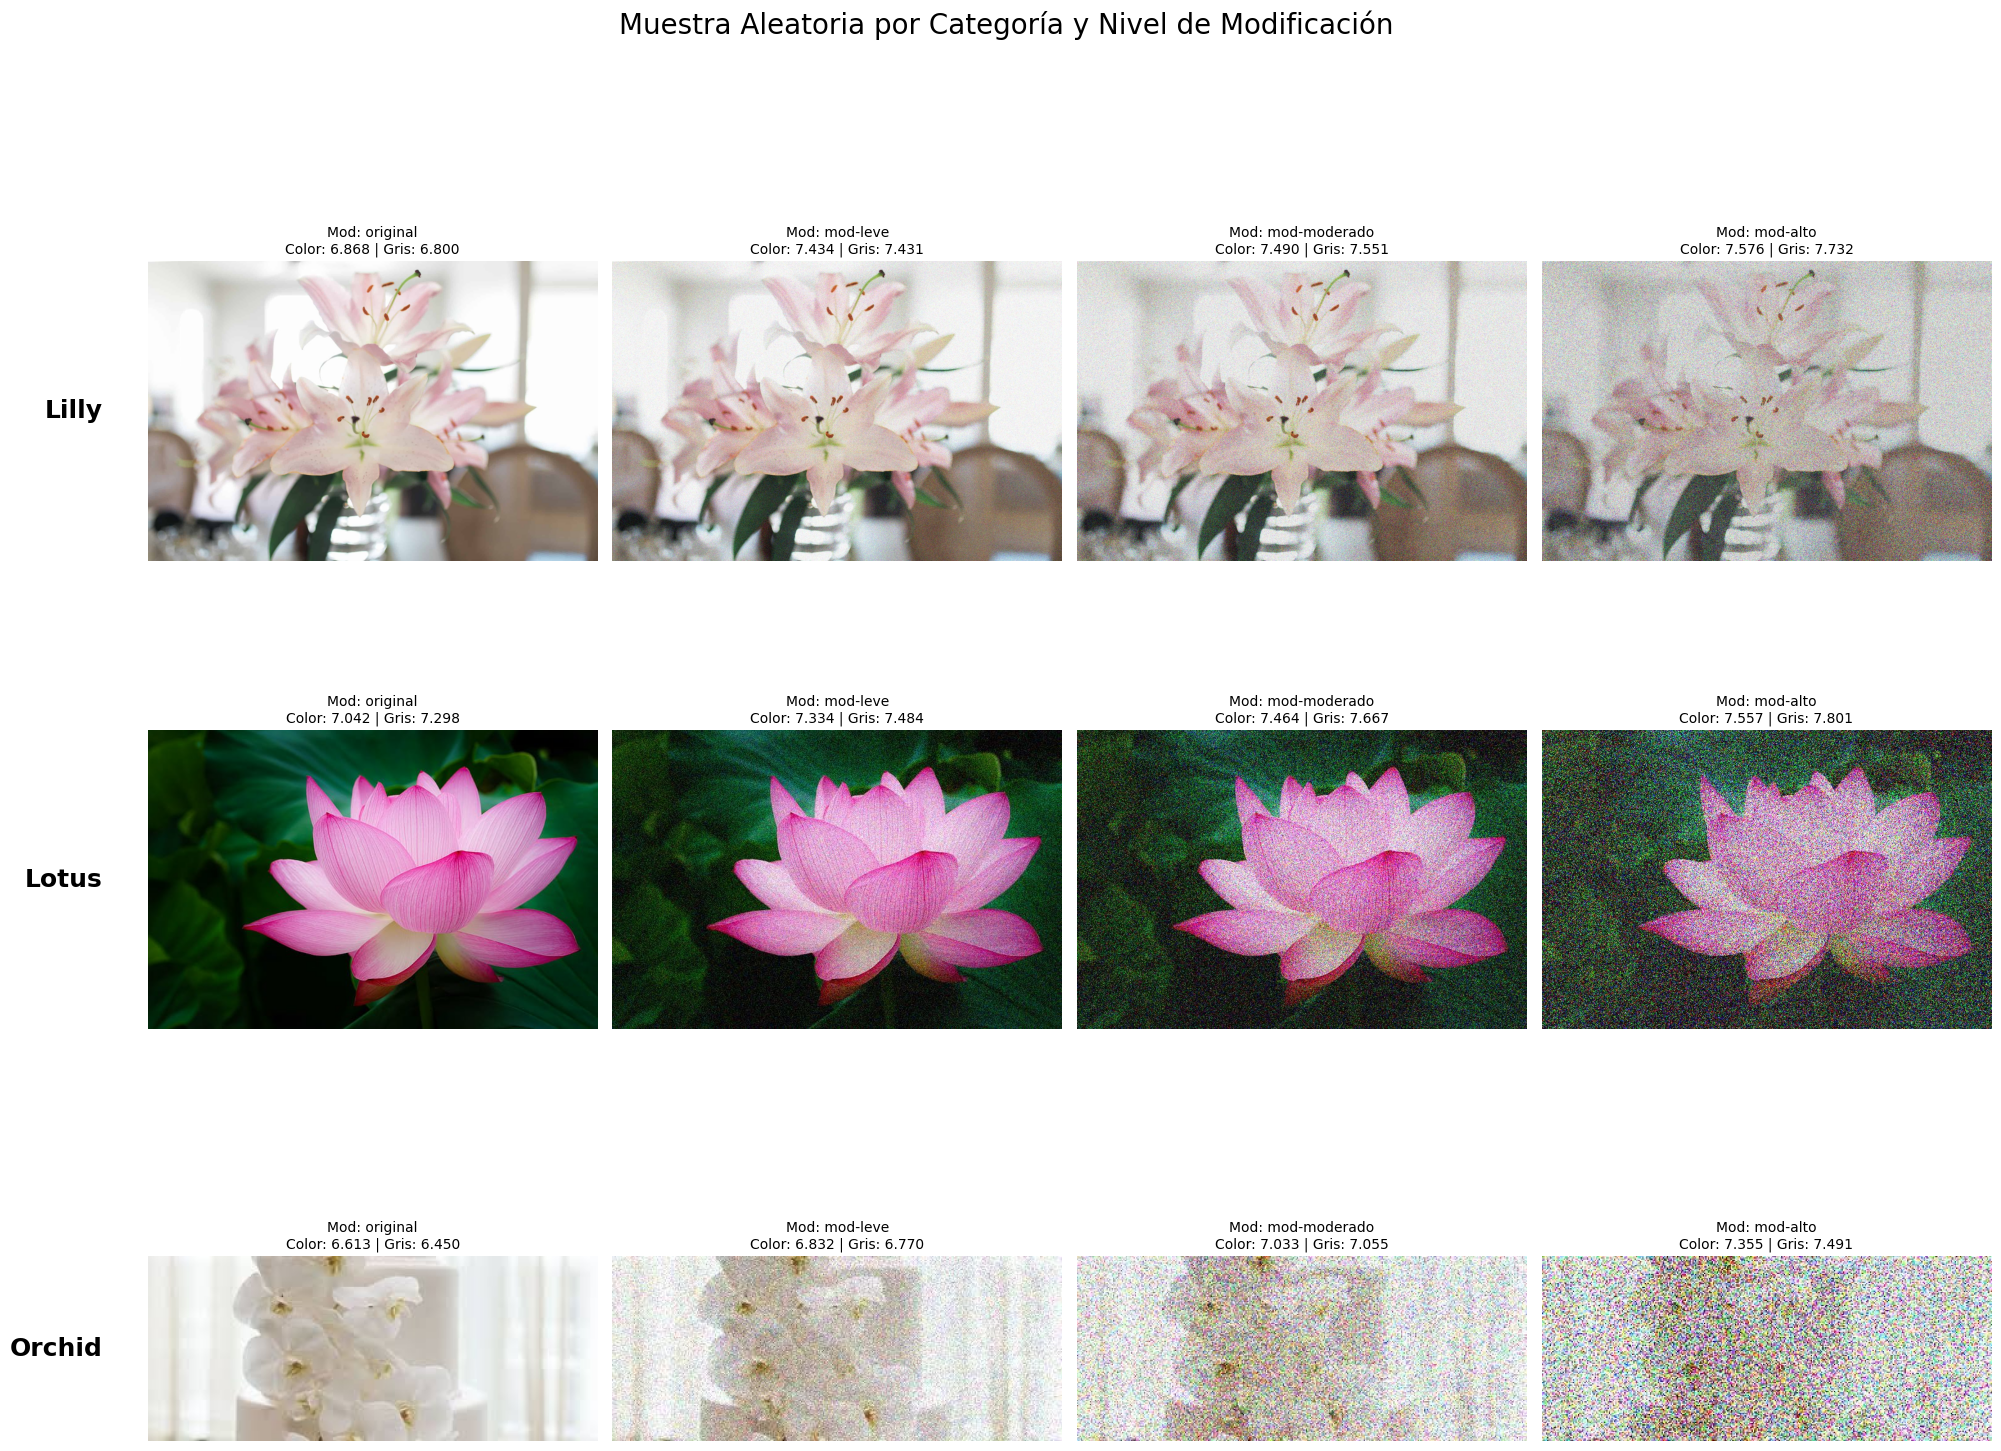

In [ ]:
if 'resultados' in locals() and len(resultados) > 0:
    df_resultados = pd.DataFrame(resultados)

    categorias_vis = ['Lilly', 'Lotus', 'Orchid'] # 3 filas
    rutas_vis = ['original', 'mod-leve', 'mod-moderado', 'mod-alto'] # 4 columnas
    base_path = 'dataset2/'

    fig, axes = plt.subplots(len(categorias_vis), len(rutas_vis), figsize=(20, 16))
    
    fig.suptitle("Muestra Aleatoria por Categoría y Nivel de Modificación", fontsize=20, y=1.02)

    for i, categoria in enumerate(categorias_vis):
        
        try:
            nombres_originales = df_resultados[
                (df_resultados['categoria'] == categoria) & 
                (df_resultados['modificacion'] == 'original')
            ]['imagen'].unique()
            
            if len(nombres_originales) == 0:
                print(f"No se encontraron imágenes 'original' para la categoría '{categoria}'. Saltando...")
                continue
            
            img_nombre_ejemplo = random.choice(nombres_originales)

        except Exception as e:
            print(f"Error al seleccionar imagen para '{categoria}': {e}")
            continue

        for j, modificacion in enumerate(rutas_vis):
            
            ax = axes[i, j] 
            
            datos_img = df_resultados[
                (df_resultados['imagen'] == img_nombre_ejemplo) &
                (df_resultados['modificacion'] == modificacion)
            ]
            
            if not datos_img.empty:
                ent_color = datos_img['entropia_color'].iloc[0]
                ent_gris = datos_img['entropia_gris'].iloc[0]
                
                img_path = os.path.join(base_path, modificacion, categoria, img_nombre_ejemplo)
                
                try:
                    img = io.imread(img_path)
                    ax.imshow(img)
                    
                    titulo = f"Mod: {modificacion}\nColor: {ent_color:.3f} | Gris: {ent_gris:.3f}"
                    ax.set_title(titulo, fontsize=10)

                except FileNotFoundError:
                    ax.set_title(f"{modificacion}\n(Archivo no encontrado)", fontsize=10)
                
            else:
                ax.set_title(f"{modificacion}\n(Datos no encontrados)", fontsize=10)

            ax.axis('off')
            
            if j == 0:
                ax.text(-0.1, 0.5, categoria, transform=ax.transAxes, 
                        fontsize=18, va='center', ha='right', weight='bold')

    plt.tight_layout(rect=[0, 0, 1, 0.98]) 
    plt.show()

else:
    print("La lista 'resultados' no está definida o está vacía.")
    print("Por favor, ejecuta primero la celda de cálculo de entropía.")

## 5. Exportación de Resultados a CSV

In [13]:
df_entropia = pd.DataFrame(resultados)
print(df_entropia.head(10))

# Exportar a CSV
csv_filename = 'resultados_entropia_flores.csv'
df_entropia.to_csv(csv_filename, index=False)

  categoria          imagen modificacion  entropia_color  entropia_gris
0     Lilly  dd9b725232.jpg     original        4.034388       4.380307
1     Lilly  695d17ceb5.jpg     original        4.866074       4.888728
2     Lilly  d8a9d64b73.jpg     original        5.718712       5.573146
3     Lilly  0da73f3c61.jpg     original        7.357224       7.622747
4     Lilly  44fe9f3983.jpg     original        6.639399       6.722070
5     Lilly  a78baaa7e3.jpg     original        7.899289       7.728705
6     Lilly  a779e97cb0.jpg     original        7.236743       6.963942
7     Lilly  8720a46d82.jpg     original        2.519112       2.476338
8     Lilly  d8516f7e87.jpg     original        6.751682       6.659895
9     Lilly  7bb31a95bd.jpg     original        7.575991       7.421343


## 6. Visualización: Diagrama de Cajas y Bigotes

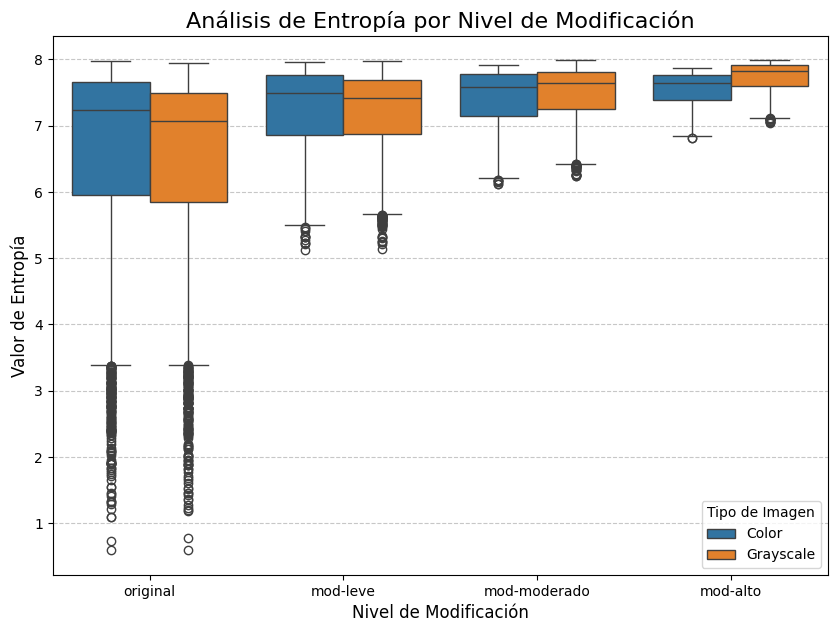

In [14]:
df_para_grafico = df_entropia.melt(
    id_vars=['modificacion', 'categoria', 'imagen'], 
    value_vars=['entropia_color', 'entropia_gris'],
    var_name='Image Type',  
    value_name='Entropy'    
)

df_para_grafico['Image Type'] = df_para_grafico['Image Type'].replace({
    'entropia_color': 'Color',
    'entropia_gris': 'Grayscale'
})

orden_modificaciones = ['original', 'mod-leve', 'mod-moderado', 'mod-alto']

# Crear el Diagrama de Cajas y Bigotes
plt.figure(figsize=(10, 7)) 

sns.boxplot(
    data=df_para_grafico,
    x='modificacion',
    y='Entropy',
    hue='Image Type',       
    order=orden_modificaciones
)

plt.title('Análisis de Entropía por Nivel de Modificación', fontsize=16)
plt.xlabel('Nivel de Modificación', fontsize=12)
plt.ylabel('Valor de Entropía', fontsize=12)
plt.legend(title='Tipo de Imagen')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Análisis Visual

- Existe una correlación positiva y directa entre el nivel de modificación y el valor de la entropía en las imágenes en escala de grises (cajas naranjas). A medida que el nivel de modificación incrementa de original a modificación alta, la mediana de la entropía aumenta consistentemente.
- Las imágenes originales, tanto en color como en gris, presentan una gran cantidad de outliers con entropía muy baja.A medida que se aplica la modificación, estos outliers desaparecen casi por completo posiblemente debido a que el proceso de modificación normaliza las imágenes.
- Mientras que la entropía de las imágenes en escala de grises muestra un claro aumento, la mediana de la entropía en las imágenes a color (cajas azules) se mantiene relativamente estancada (≈7.6−7.7). Para este tipo de modificaciones, la entropía calculada sobre la imagen en escala de grises parece ser un indicador más sensible y fiable para detectar el grado de alteración.

## 7. Visualización: Gráficos de Densidad (KDE)

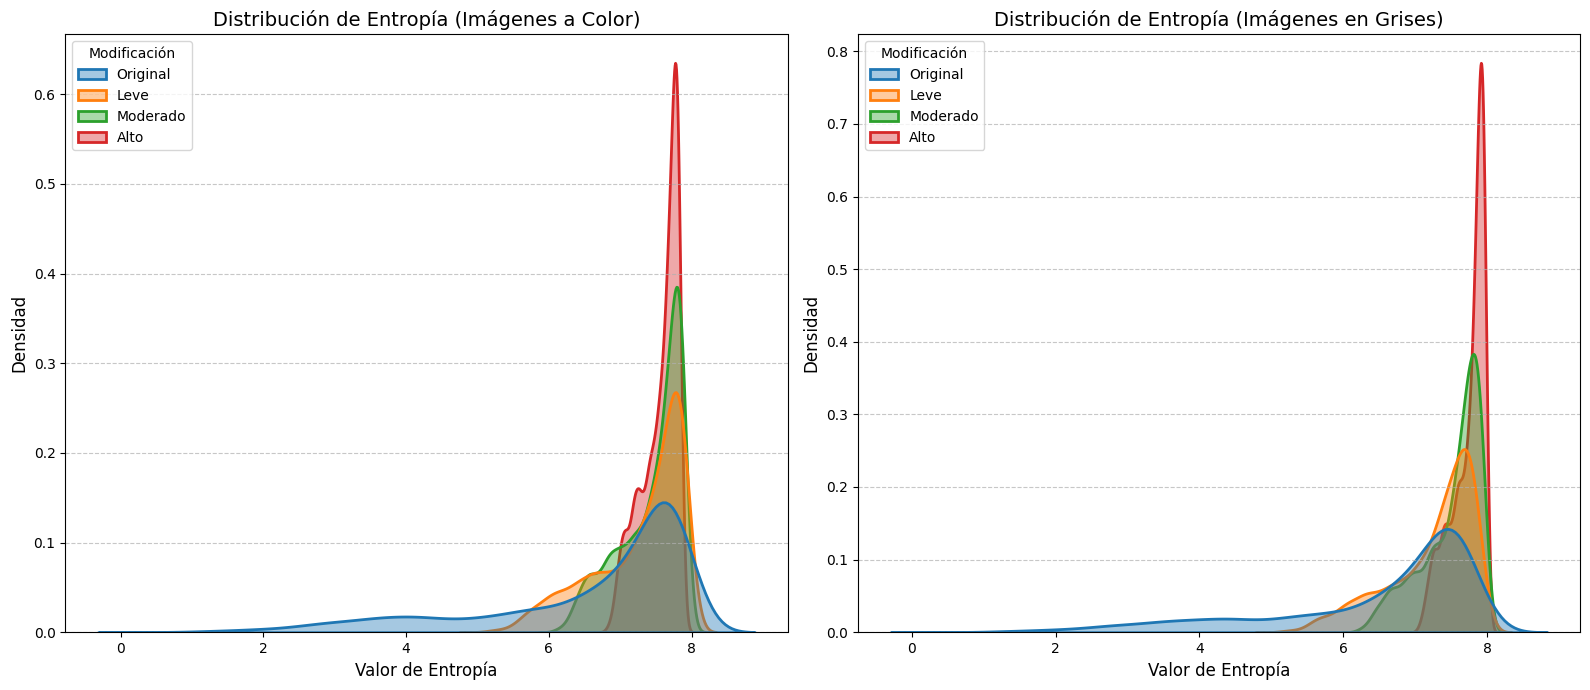

In [56]:
df_para_grafico = df_entropia.copy()

df_para_grafico = df_para_grafico.rename(columns={'modificacion': 'Modificación'})

mod_map = {
    'original': 'Original',
    'mod-leve': 'Leve',
    'mod-moderado': 'Moderado',
    'mod-alto': 'Alto'
}

df_para_grafico['Modificación'] = df_para_grafico['Modificación'].map(mod_map)
orden_modificaciones_bonito = ['Original', 'Leve', 'Moderado', 'Alto']


plt.figure(figsize=(16, 7))
# Primer Gráfico: Entropía a color
ax1 = plt.subplot(1, 2, 1) 

sns.kdeplot(
    data=df_para_grafico,           
    x='entropia_color',
    hue='Modificación',             
    hue_order=orden_modificaciones_bonito,
    fill=True,
    alpha=0.4,
    linewidth=2,
    ax=ax1  
)
ax1.set_title('Distribución de Entropía (Imágenes a Color)', fontsize=14)
ax1.set_xlabel('Valor de Entropía', fontsize=12)
ax1.set_ylabel('Densidad', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)


# Segundo Gráfico: Entropía en gris
ax2 = plt.subplot(1, 2, 2) 

sns.kdeplot(
    data=df_para_grafico,          
    x='entropia_gris',
    hue='Modificación',
    hue_order=orden_modificaciones_bonito,
    fill=True,
    alpha=0.4,
    linewidth=2,
    ax=ax2  
)
ax2.set_title('Distribución de Entropía (Imágenes en Grises)', fontsize=14)
ax2.set_xlabel('Valor de Entropía', fontsize=12)
ax2.set_ylabel('Densidad', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Gráficos de Densidad

- Existe un desplazamiento de las distribuciones hacia la derecha a medida que aumenta el nivel de modificación. Esto demuestra de forma concluyente que a mayor modificación (ruido), mayor es la entropía de la imagen.
- En el gráfico de "Imágenes en Grises", la separación entre los picos de las cuatro distribuciones es más nítida y clara que en el gráfico de "Imágenes a Color". Esto sugiere que, la entropía en escala de grises es un indicador más sensible y robusto para diferenciar entre los distintos niveles de alteración.

## 8. Conclusiones

- **Correlación entre Ruido y Entropía:** El estudio demostró una correlación positiva y directa entre el nivel de ruido gaussiano añadido a las imágenes y su entropía. A medida que la varianza del ruido aumentaba (de `original` a `mod-alto`), la entropía de las imágenes, tanto en escala de grises como a color, tendía a incrementarse. Esto confirma que la entropía de Shannon es una métrica efectiva para cuantificar el nivel de desorden o aleatoriedad en una imagen.
- **Sensibilidad de la Entropía en Escala de Grises:** El análisis reveló que la entropía calculada sobre las imágenes en escala de grises es un indicador más sensible y discriminativo para detectar cambios que la entropía de las imágenes a color. Mientras que los valores de entropía en escala de grises mostraron un aumento claro y consistente con cada nivel de modificación, la entropía de las imágenes a color se mantuvo relativamente estancada, especialmente en los niveles de modificación más altos. Los gráficos de densidad (KDE) y los diagramas de caja y bigotes respaldaron visualmente esta observación, mostrando una separación más nítida entre las distribuciones de los diferentes niveles de ruido para las imágenes en escala de grises.
- **Normalización de Outliers:** Las imágenes originales presentaban una cantidad significativa de outliers con valores de entropía bajos, lo que sugiere que algunas imágenes eran visualmente muy simples. La adición de ruido, incluso a un nivel leve, normalizó estas imágenes, eliminando casi por completo dichos outliers y homogeneizando la distribución de la entropía.
- **Aplicación Práctica:** Este experimento valida el uso de la entropía como una herramienta fundamental en el procesamiento de imágenes para la detección de cambios. La mayor sensibilidad de la entropía en escala de grises sugiere que, para análisis de textura o detección de ruido, convertir las imágenes a escala de grises puede ser un paso de preprocesamiento beneficioso para obtener resultados más claros y robustos.

## 9. Referencias

- [1] Resumen de Termodinámica: Entropía - Teachy, acceso: octubre 25, 2025, https://teachy.ai/es/resumenes/educacion-media/media-superior-2-grado/fisica-a-espanol/resumen-de-termodinamica-entropia
- [2] ¿Qué es la entropía en la termodinámica? - Quora, acceso: octubre 25, 2025, https://es.quora.com/Qu%C3%A9-es-la-entrop%C3%ADa-en-la-termodin%C3%A1mica
- [3] Entropía (información) - Wikipedia, la enciclopedia libre, acceso: octubre 25, 2025, https://es.wikipedia.org/wiki/Entrop%C3%ADa_(informaci%C3%B3n)
- [4] Teoría de la información - Wikipedia, la enciclopedia libre, acceso: octubre 25, 2025, https://es.wikipedia.org/wiki/Teor%C3%ADa_de_la_informaci%C3%B3n
- [5] entropy - Entropía de imagen en escala de grises - MATLAB - MathWorks, acceso: octubre 25, 2025, https://es.mathworks.com/help/images/ref/entropy.html
- [6] Entropy — skimage 0.25.2 documentation, acceso: octubre 25, 2025, https://scikit-image.org/docs/0.25.x/auto_examples/filters/plot_entropy.html
